## Importing and Loading

In [1]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np

from util.utils import read_im, save_im, normalize

input_dir = pathlib.Path("images/input")
output_dir = pathlib.Path("images/output")
output_dir.mkdir(exist_ok=True)

Load the image

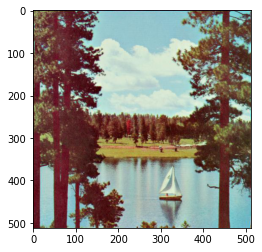

In [2]:
image = read_im(input_dir.joinpath("lake.jpg"))
plt.imshow(image)

# Task 2a

Implement a function that converts an RGB image to greyscale. 

In [3]:
def greyscale(image):
    for x in range(0, len(image)):
        for y in range(0, len(image[0])):
            r, g, b = image[x][y]
            image[x][y] = 0.212 * r + 0.715 * g + 0.0722 * b
    return image

Testing the function:

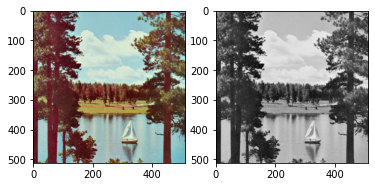

In [4]:
image_greyscaled = greyscale(image.copy())
save_im(output_dir.joinpath("task-2a.jpg"), image_greyscaled)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(image_greyscaled)

# Task 2b

Implement a function that takes a grayscale image and applies the following intensity transformation *T(p) = 1 − p*.

In [5]:
def inverse(image): 
    for x in range(0, len(image)):
        for y in range(0, len(image[0])):
            image[x][y] = 1 - image[x][y]
    return image

Testing the function:

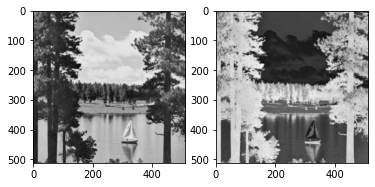

In [6]:
image_inverse = inverse(image_greyscaled.copy())
save_im(output_dir.joinpath("task-2b.jpg"), image_inverse)
plt.subplot(1, 2, 1)
plt.imshow(image_greyscaled)
plt.subplot(1, 2, 2)
plt.imshow(image_inverse)

# Task 2c

Implement a function that takes an RGB image and a convolutional kernel as input, and performs 2D spatial convolution. Assume the size of the kernel is odd numbered, e.g. *3 × 3*, *5 × 5*, or *7 × 7*. You must implement the convolution operation yourself from scratch.

You are not required to implement a procedure for adding or removing padding (you can return
zero in cases when the convolutional kernel goes outside the original image).

In [7]:
def convolve_im(image, kernel):
    assert len(image.shape) == 3

    flipped_kernel = np.flipud(np.fliplr(kernel))
    conv_image = np.zeros_like(image)
    kernel_size, _ = kernel.shape
    padding = kernel_size // 2

    for row in range(padding, len(image) - padding):
        for col in range(padding, len(image[0]) - padding):
            for channel in range(3):
                conv_image[row][col][channel] = (flipped_kernel * image[row - padding:row + padding + 1, col - padding:col + padding + 1, channel]).sum()

    return conv_image

Testing the function:

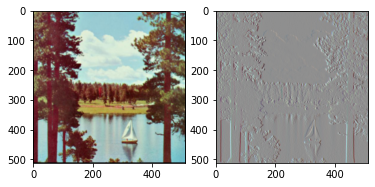

In [8]:

# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(image.copy(), h_b)
save_im(output_dir.joinpath("task-2c-smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(image, sobel_x)
save_im(output_dir.joinpath("task-2c-sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),         f"Your convolve function has to return a np.array. " +        f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == image.shape,         f"Expected smoothed im ({im_smoothed.shape}" +         f"to have same shape as im ({image.shape})"
assert im_sobel.shape == image.shape,         f"Expected smoothed im ({im_sobel.shape}" +         f"to have same shape as im ({image.shape})"
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))
plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()